**Face Mask detection model**

**1. The Setup phase**
* Importing necessary libraries


In [ ]:
import pandas as pd                               
import numpy as np                                
import tensorflow as tf                           
from tensorflow import keras                      
from tensorflow.keras.models import Sequential    
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D,Dropout  
from tensorflow.keras.optimizers import Adam      
from keras.preprocessing import image             
from keras.preprocessing.image import ImageDataGenerator  
import matplotlib.pyplot as plt                   
from google.colab import files                   

**Here We upload the dataset file called `"data"` that has 2 subfolders `"with"` and `"without`" and unzip**




In [ ]:
# upload dataset file
uploaded = files.upload()

Saving data.zip to data.zip


In [ ]:
# unzipping the folder
!unzip data.zip

Archive:  data.zip
   creating: data/
  inflating: __MACOSX/._data         
  inflating: data/.DS_Store          
  inflating: __MACOSX/data/._.DS_Store  
   creating: data/with_mask/
  inflating: __MACOSX/data/._with_mask  
   creating: data/without_mask/
  inflating: __MACOSX/data/._without_mask  
  inflating: data/with_mask/augmented_image_218.jpg  
  inflating: __MACOSX/data/with_mask/._augmented_image_218.jpg  
  inflating: data/with_mask/augmented_image_19.jpg  
  inflating: __MACOSX/data/with_mask/._augmented_image_19.jpg  
  inflating: data/with_mask/augmented_image_31.jpg  
  inflating: __MACOSX/data/with_mask/._augmented_image_31.jpg  
  inflating: data/with_mask/augmented_image_25.jpg  
  inflating: __MACOSX/data/with_mask/._augmented_image_25.jpg  
  inflating: data/with_mask/augmented_image_230.jpg  
  inflating: __MACOSX/data/with_mask/._augmented_image_230.jpg  
  inflating: data/with_mask/419-with-mask.jpg  
  inflating: __MACOSX/data/with_mask/._419-with-mask.jpg  
  i

In [ ]:
#delete the zip file as it is not needed anymore
!rm data.zip

In [ ]:
# setting the batch size and the epochs
batch_size = 8
epochs = 30

**Splitting the images ( 80% training and 20% 
validation ) and Data augmanting it**



In [ ]:
directory = 'data'
img_datagen = ImageDataGenerator(validation_split = 0.2,        # Splits the data into training (80%) and validation (20%)
                                   rescale = 1./255,            # Multiply the colors by a number between 0-1 to process data faster
                                   rotation_range = 40,         # rotate the images
                                   width_shift_range = 0.2,     # fraction of the total width
                                   height_shift_range = 0.2,    # fraction of the total height
                                   zoom_range = 0.2,            # float percent
                                   horizontal_flip = True,      # horizontal flip
                                   fill_mode = 'nearest')       # add new pixels when the image is rotated or shifted


train_generator = img_datagen.flow_from_directory(
                                directory,
                                target_size = (70, 70),
                                batch_size = batch_size,
                                color_mode ="rgb",              # for coloured images
                                class_mode = 'binary',
                                shuffle = True,
                                seed = 42,                      # to make the result reproducible
                                subset = 'training')            # Specify this is training set

validation_generator = img_datagen.flow_from_directory(
                                directory,
                                target_size = (70, 70),
                                batch_size = batch_size,
                                color_mode = "rgb",             # for coloured images
                                class_mode = 'binary',
                                subset = 'validation')          # Specify this is training set



Found 1101 images belonging to 2 classes.
Found 275 images belonging to 2 classes.


**Display a batch of the images used in the training and thier labels**

In [ ]:
# generate a batch of images and labels from the training set
imgs, labels = next(train_generator)

In [ ]:
# plotting function

def plotImages(images_arr):
    fig, axes = plt.subplots(1, batch_size, figsize = (20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

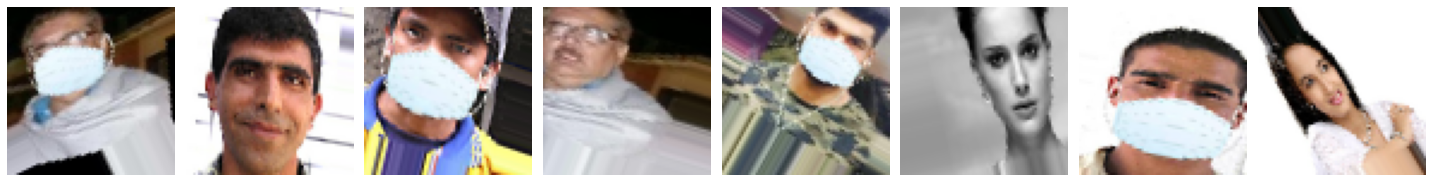

[0. 1. 0. 1. 0. 1. 0. 1.]


In [ ]:
# displaying the images and thier labels,
# where as 0 with mask and 1 without mask
plotImages(imgs);
print(labels);

**2. Build and train the CNN**





Sequencial is a list of the layers of the model we want to create. Here it consists of

*   Conv2D Layer
> * **The filter** parameter means the number of this layer's output filters which is less in the early layers and more when we are closer to the prediction, [ recommended to start up with 32,64,128 and the number varies according to the depth of the model ]
> *   **The kernal_size** specifies the width and the height of the 2D convolution window [odd integer and depend on the image size if image size > 128x128 then use 5*5 if less use 3x3 or 1x1]
> *   **The activation** parameter refers to the type of activation function
> *   **The padding** parameter is enabled to zero-padding to preserve the spatial dimensions of the volume so the output volume size matches the input volume size
> *   **The input_shape** parameter has pixel high and pixel wide and have the 3 color channels: RGB

*   MaxPool2D Layer
> To pool and reduce the dimensionlaity of the data
> *   pool_size: max value over a 2x2 pooling window
> *  strides: how far the pooling window moves for each pooling step
*   Flatten Layer
> * flatten is used to flatten the input to a 1D vector then passed to dense

*   Dense Layer (The output layer)
> * **The units** parameter means that it has 2 nodes one for with and one for without because we want a binary output 
> *   **The activation** parameter we use the softmax activation function on our output so that the output for each sample is a probability distribution over the outputs of with and without mask






In [ ]:
# creating the model layers
# we have functional and sequential
model = Sequential([
                    Conv2D(filters = 32, kernel_size = (3,3),activation = 'relu',padding = 'same',input_shape = (70,70,3)),
                    MaxPool2D(pool_size = (2,2), strides = 2),
                    Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', padding = 'same'),
                    MaxPool2D(pool_size = (2,2), strides = 2),
                    Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu', padding = 'same'),
                    MaxPool2D(pool_size = (2,2), strides = 2),
                    Flatten(),
                    Dense(units = 64, activation = 'relu'),
                    # means the output is 0,1 (the labels) and the P(c = 0) + P(c = 1) = 1 
                    Dense(units = 1, activation = 'sigmoid'), 

])

# check out the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 70, 70, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 35, 35, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 35, 35, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 17, 17, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 17, 17, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 8, 8, 64)         0

Compile the model using the **Adam** optimizer with **learning rate** of `0.0001`,  a **loss** of `binary_crossentropy`, and we'll look at `accuracy` as our performance **metric**.

In [ ]:
model.compile(optimizer = Adam(learning_rate = 0.0001),         # remsprop, adadelta
              loss = 'binary_crossentropy',                     # mean_squared_error (regression task), categorical_crossentropy
              metrics = ['accuracy'])                           # metrices to keep track off

We use the `train_generator` because we are now only training the data. The 
validation data is the `validation_generator` 


In [ ]:
# Training the model
history = model.fit(train_generator ,epochs = epochs,validation_data= validation_generator, batch_size= batch_size) 

Epoch 1/30
138/138 [==============================] - 19s 57ms/step - loss: 0.5870 - accuracy: 0.7039 - val_loss: 0.4384 - val_accuracy: 0.8036
Epoch 2/30
138/138 [==============================] - 7s 54ms/step - loss: 0.3474 - accuracy: 0.8647 - val_loss: 0.2937 - val_accuracy: 0.9164
Epoch 3/30
138/138 [==============================] - 8s 54ms/step - loss: 0.3031 - accuracy: 0.8828 - val_loss: 0.2930 - val_accuracy: 0.8982
Epoch 4/30
138/138 [==============================] - 7s 54ms/step - loss: 0.2664 - accuracy: 0.9055 - val_loss: 0.2857 - val_accuracy: 0.8655
Epoch 5/30
138/138 [==============================] - 8s 55ms/step - loss: 0.2485 - accuracy: 0.9064 - val_loss: 0.2420 - val_accuracy: 0.9164
Epoch 6/30
138/138 [==============================] - 7s 54ms/step - loss: 0.2435 - accuracy: 0.9055 - val_loss: 0.2095 - val_accuracy: 0.9309
Epoch 7/30
138/138 [==============================] - 8s 55ms/step - loss: 0.2148 - accuracy: 0.9183 - val_loss: 0.2347 - val_accuracy: 0.887

In [ ]:
model.save('MaskCheck.model')

INFO:tensorflow:Assets written to: MaskCheck.model/assets


In [ ]:
# loading a model
new_model = tf.keras.models.load_model('MaskCheck.model') 

**3. Plotting the loss and accuracy of training vs validation**





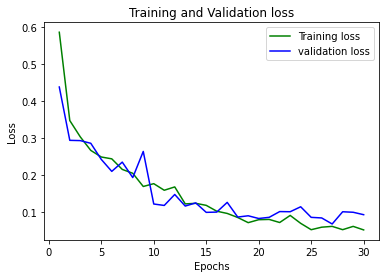

In [ ]:
# Plotting the loss of validation and training 
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochstoplot = range(1,epochs+1)
plt.plot(epochstoplot, loss_train, 'g', label='Training loss')
plt.plot(epochstoplot, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

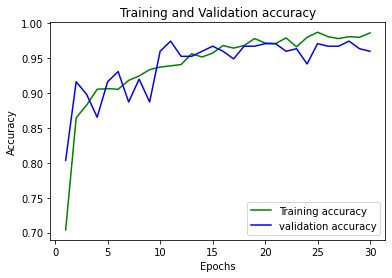

In [ ]:
# Plotting the accuracy of validation and training 
accur_train = history.history['accuracy']
accur_val = history.history['val_accuracy']
plt.plot(epochstoplot, accur_train, 'g', label='Training accuracy')
plt.plot(epochstoplot, accur_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


**This is formatted as code**
* 4. Testing the CNN model


In [ ]:
# upload file
uploaded = files.upload()

Saving test.zip to test.zip


In [ ]:
# unzipping the folder
!unzip test.zip

Archive:  test.zip
   creating: test/
  inflating: __MACOSX/._test         
  inflating: test/.DS_Store          
  inflating: __MACOSX/test/._.DS_Store  
  inflating: test/8.jpg              
  inflating: __MACOSX/test/._8.jpg   
  inflating: test/9.jpg              
  inflating: __MACOSX/test/._9.jpg   
  inflating: test/14.jpg             
  inflating: __MACOSX/test/._14.jpg  
  inflating: test/15.jpg             
  inflating: __MACOSX/test/._15.jpg  
  inflating: test/17.jpg             
  inflating: __MACOSX/test/._17.jpg  
  inflating: test/16.jpg             
  inflating: __MACOSX/test/._16.jpg  
  inflating: test/12.jpg             
  inflating: __MACOSX/test/._12.jpg  
  inflating: test/13.jpg             
  inflating: __MACOSX/test/._13.jpg  
  inflating: test/11.jpg             
  inflating: __MACOSX/test/._11.jpg  
  inflating: test/10.jpg             
  inflating: __MACOSX/test/._10.jpg  
  inflating: test/18.jpg             
  inflating: __MACOSX/test/._18.jpg  
  inflati

In [ ]:
# delete the zip file as it is not needed anymore
!rm test.zip

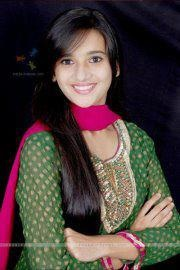



The person is not wearing a mask.



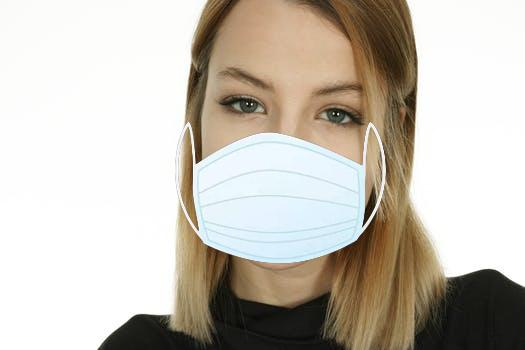



The person is wearing a mask. 



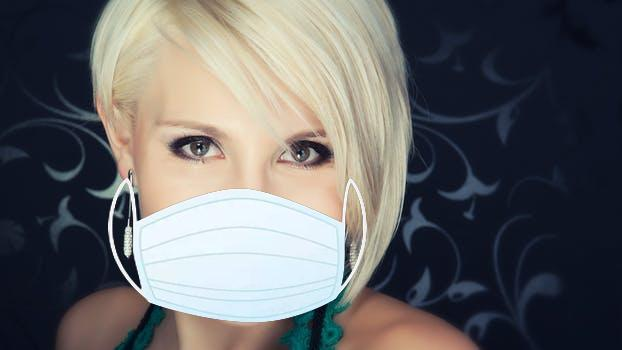



The person is wearing a mask. 



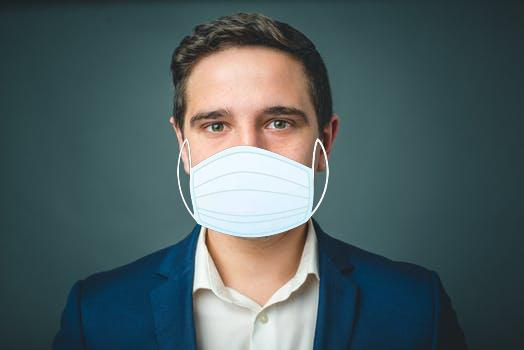



The person is wearing a mask. 



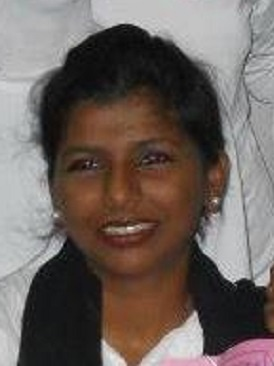



The person is not wearing a mask.



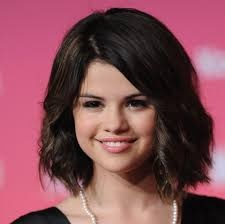



The person is not wearing a mask.



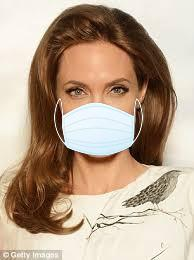



The person is wearing a mask. 



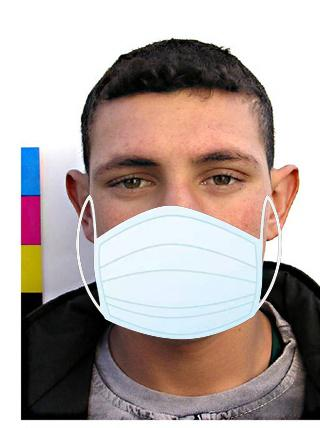



The person is wearing a mask. 



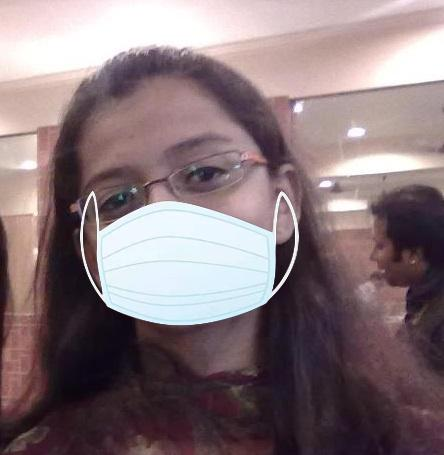



The person is wearing a mask. 



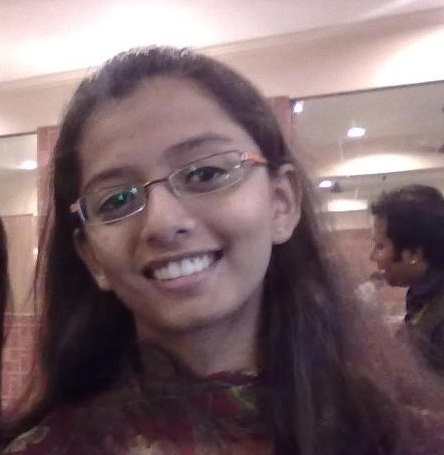



The person is not wearing a mask.



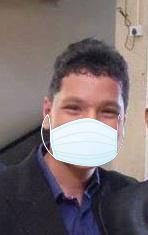



The person is wearing a mask. 



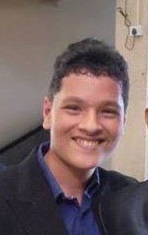



The person is not wearing a mask.



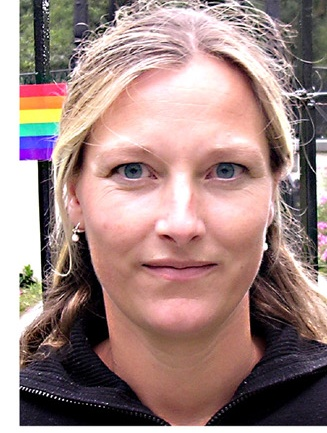



The person is not wearing a mask.



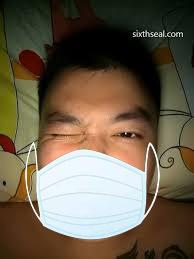



The person is wearing a mask. 



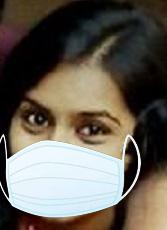



The person is wearing a mask. 



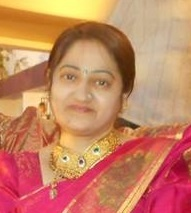



The person is not wearing a mask.



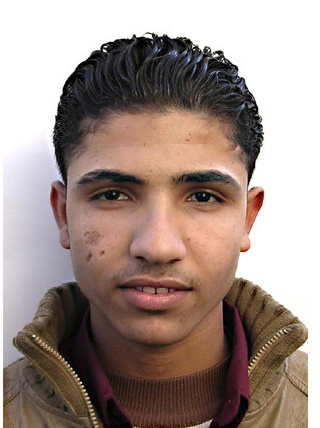



The person is not wearing a mask.



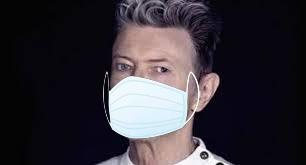



The person is wearing a mask. 



In [ ]:
from IPython.display import Image, display
TGREEN =  '\033[1;37;42m'
TRED =    '\033[1;37;41m'
for i in range (0,18):
  img_directory = str(i) + '.jpg'
  img_data = image.load_img('test/' + img_directory, target_size = (70, 70))   # load the image from the directory
  img_data = image.img_to_array(img_data)                                      # convert the image to a Numpy array
  img_data = np.expand_dims(img_data, axis = 0)                                # expands the array by inserting a new axis at the specified position.

  classify = model.predict(img_data)
  display(Image('test/' + img_directory,width= 150, height=150))
  print("\n")
  if(int(classify[0][0]) == 0):
    print(TGREEN + "The person is wearing a mask. \n")
  else:
    print(TRED + "The person is not wearing a mask.\n")